## 🐹 🐾 [Text Corpus <font size='1.8'>코퍼스/말뭉치</font>](https://en.wikipedia.org/wiki/Text_corpus)
- In linguistics, a corpus (plural corpora) or text corpus is a language resource consisting of a large and structured set of texts (nowadays usually electronically stored and processed). In corpus linguistics, they are used to do statistical analysis and hypothesis testing, checking occurrences or validating linguistic rules within a specific language territory.

- The **corpus-toolkit** package grew out of courses in corpus linguistics and learner corpus research. The toolkit attempts to balance simplicity of use, broad application, and scalability. Common corpus analyses such as the <font color = 'red'>_calculation of word and n-gram frequency and range, keyness, and collocation_</font> are included. In addition, more advanced analyses such as the identification of <font color = 'red'>_dependency bigrams (e.g., verb-direct object combinations) and their frequency, range, and strength of association_</font>  are also included.(https://pypi.org/project/corpus-toolkit/)

Some conditions should be fulfilled if you want to conduct corpus-related analysis.

>1. Read and write a file using an operating system package.
>2. 🆘 import the **[os](https://docs.python.org/3/library/os.html)** module.


>3. Text files you want to analyze (e.g., url(uniform resource locator) with html document, text files under the Files dicrectory of Google Colab).
>4. Text ➡️ Words: **Tokenization**
>5. Words with the conjugation, inflection, derivation process ↔️ Words sorted by grouping inflected or variant forms of the same word (i.e., **lemmatization**)
>6. POS (part of speech (e.g., word-grammatical category pairs))
>7. 🆘 Install **corpus-toolkit** and **nltk**(natural language tool kit) packages.



In [28]:
#@markdown 📌 Download the os module
import os

In [17]:
#@markdown 📌 Make a new working directory as "txtdata". 📎 <Module name: os> <function: mkdir>

os.mkdir("txtdata")

In [29]:
#@markdown 📌 Download the corpus-toolkit package
!pip install corpus-toolkit

In [30]:
from urllib.request import urlopen

#@markdown 📌 Open a txt file. <Use a set of duble quotation marks "" and assign the url address as the _url_ variable>
url="https://raw.githubusercontent.com/ms624atyale/Data_Misc/main/crime_punishment_chapter_one.txt"
#When you copy and paste, i) go to the repository of your/someone else's github, ii) click on a txt file of your interest, iii) click on <raw> icon around at the top right hand corner, and iii) copy & paste the url staring with "https://raw.githubusercontent.com/..."


os.system("curl " + url + " > txtdata.txt") #This moves the whole text of the url to the txtdata folder.

file = open("txtdata.txt")
text = file.read().replace("\n", " ") #Replace line with a space.
file.close() #Close the file you have been working on.

#@markdown 📎 When you see txtdata.txt under the Files directory, move it under the txtdata folder you've created by drag & drop.

#### 🆘 **Drag your txtdata.txt file to the txtdata folder.**

In [31]:
#@markdown 📌 i) Tokenize your text and ii) Get frequency.

from corpus_toolkit import corpus_tools as ct
mydata = ct.ldcorpus("txtdata") #load and read text files under 'txtdata' directory
tok_corp = ct.tokenize(mydata) #tokenize corpus - by default this lemmatizes as well
mydata = ct.frequency(mydata) #creates a frequency dictionary

Processing txtdata.txt (1 of 1 files)


In [32]:
#@markdown 📌 Tagging (i.e., associating each token with a grammatical category (e.g., mountain - N) )
ct.write_corpus("tagged_txt",ct.tag(ct.ldcorpus("txtdata")))

Processing txtdata.txt (1 of 1 files)


In [33]:
#@markdown 📌 Get frequency of your tagged tokens. 'hits=10' means you want to get the top 10 words.

tagged_freq = ct.frequency(ct.reload("tagged_txt"))
ct.head(tagged_freq, hits = 10)

Processing 1.txt (1 of 1 files)
the_DET	2172
and_CCONJ	899
be_AUX	833
a_DET	812
he_PRON	761
to_PART	569
of_ADP	506
his_PRON	371
in_ADP	355
you_PRON	313


## 💡 Now, let's save tagged data as a dataframe and get word clouds!

In [34]:
#@markdown 📌  Tagged data is in a dictionary format (e.g., {key:value}).
type(tagged_freq)

dict

In [35]:
#@markdown 📌 Import the pandas package so as to handle dataframe.

import pandas as pd

In [36]:
#@markdown 📌 Generate a dateframe with tagged words (e.g., word_POS) and their frequencies.

data_dict = tagged_freq
data_items = data_dict.items()
data_list = list(data_items)
df = pd.DataFrame(data_list)
df.columns = ["Tagged","Freq"]
print(df)

                Tagged  Freq
0              the_DET  2172
1            wolf_NOUN    20
2            and_CCONJ   899
3             kid_NOUN     5
4           there_PRON    40
...                ...   ...
3145     overhead_NOUN     1
3146     boasting_NOUN     1
3147  chanticleer_NOUN     1
3148        rival_NOUN     1
3149       Pride_PROPN     1

[3150 rows x 2 columns]


## 💡 Splitting tagged columns into Words and POS <font size = '2.3'> part of speech (i.e., grammatical categories)
  - e.g.,
              column          column 1.    column2
          yesterday_ADP ➡️   yesterday       ADP
          rain_NOUN             rain         NOUN
          yellow_ADJ           yellow.       ADJ

In [37]:
#@markdown 📌 Codelines to get tagged columns split into words and POS

tagged = df["Tagged"]
pos = []
word = []

for i in range(0, len(tagged)):
  w = tagged[i]
  ws = w.split("_")
  word.append(ws[0])
  pos.append(ws[1])

print(len(tagged))
print(word[:10])
print(pos[:10])

3150
['the', 'wolf', 'and', 'kid', 'there', 'be', 'once', 'a', 'little', 'whose']
['DET', 'NOUN', 'CCONJ', 'NOUN', 'PRON', 'VERB', 'ADV', 'DET', 'ADJ', 'DET']


In [38]:
#@markdown 📌 Add new columns to the dataframe.

df["POS"] = pos
df["Word"] = word

# Rearranging column order (remove Tagged column)
cols = ["POS","Word","Freq"]
df = df[cols]

# Sort by POS and Freq
df = df.sort_values(by=['POS', 'Freq'], ascending = False)
print("Total rows: ", len(df))
df.head()

Total rows:  3150


,POS,Word,Freq
1699,X,nearer,1
2523,X,ass,1
89,VERB,say,158
420,VERB,have,124
187,VERB,see,112


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_11, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_12, *['Freq'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_13, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_14, *['Freq'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_15, *['POS'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_16, *['Word'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_17, *[[['index', 'Freq']]], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_18, *['POS', 'Word'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_19, *['index', 'POS'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_20, *['index', 'Word'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_21, *['Freq', 'POS'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_22, *['Freq', 'Word'], **{'inner': 'stick'})
chart

##⛅  Creating wordclouds by POS
>1. Below, "wc" takes text, not list. So we make word-list-by-POS into a text using 'join'.
>2. In addition, the joined text should include words according to their frequency. (e.g., if "before" occurs 5 times, then the text should include "before before before before before".

In [39]:
#@markdown 📌 Select POS = VERB
df1 = df[df["POS"] == "VERB"]; print(len(df1))

# as list
freq1 = list(df1["Freq"]); print(len(freq1))
txt1 = list(df1["Word"]); print(len(txt1))

# Repeat words by Freq
import numpy as np
# x = np.array(txt1)
y = np.repeat(txt1, freq1, axis=0)
y = list(y)

txt2 = ' '.join(y); print(len(txt2))
print(txt2)

693
693
693
20762
say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have 

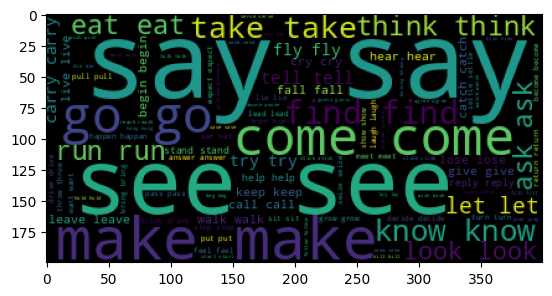

In [40]:
#@markdown 📌 High frequency POS
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wc = WordCloud().generate(str(txt2))
plt.imshow(wc)


## ⛅ ⛅The following codes will provide you POS options such as NOUN, ADJ, ADV.

## 📎 Select POS you want.

693
       POS      Word  Freq
89    VERB       say   158
420   VERB      have   124
187   VERB       see   112
12    VERB      make    97
485   VERB       get    84
...    ...       ...   ...
3131  VERB      yard     1
3133  VERB   express     1
3135  VERB  approach     1
3136  VERB      shut     1
3144  VERB    circle     1

[693 rows x 3 columns]


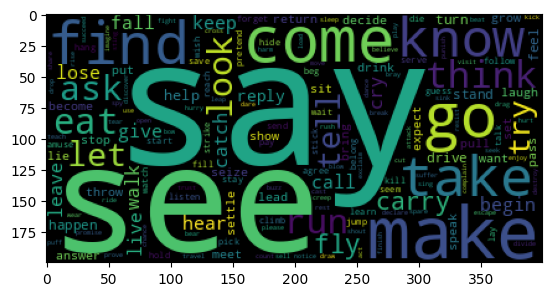

In [41]:
#@markdown 📌 Wordcloud by POS:

pos = "VERB" #@param = ["VERB","NOUN","ADJ","ADV"]
df1 = df[df["POS"] == pos]; print(len(df1))

# as list
freq1 = list(df1["Freq"])
txt1 = list(df1["Word"])

# Repeat words by Freq
import numpy as np
# x = np.array(txt1)
y = np.repeat(txt1, freq1, axis=0)
y = list(y)

txt2 = ' '.join(y)

print(df[df["POS"] == pos])
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Collocations = False (otherwise, Wordcloud takes 'light light' as a collocation and add it on the wordcloud )
wc = WordCloud(collocations = False).generate(str(txt2))
plt.imshow(wc)

1188
       POS         Word  Freq
214   NOUN          day    74
471   NOUN         time    63
50    NOUN         head    43
81    NOUN          way    33
320   NOUN        water    32
...    ...          ...   ...
3140  NOUN         gain     1
3145  NOUN     overhead     1
3146  NOUN     boasting     1
3147  NOUN  chanticleer     1
3148  NOUN        rival     1

[1188 rows x 3 columns]


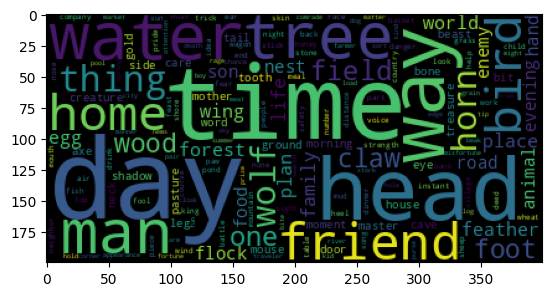

In [42]:
#@markdown 📌 Wordcloud by POS:

pos = "NOUN" #@param = ["VERB","NOUN","ADJ","ADV"]
df1 = df[df["POS"] == pos]; print(len(df1))

# as list
freq1 = list(df1["Freq"])
txt1 = list(df1["Word"])

# Repeat words by Freq
import numpy as np
# x = np.array(txt1)
y = np.repeat(txt1, freq1, axis=0)
y = list(y)

txt2 = ' '.join(y)

print(df[df["POS"] == pos])
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Collocations = False (otherwise, Wordcloud takes 'light light' as a collocation and add it on the wordcloud )
wc = WordCloud(collocations = False).generate(str(txt2))
plt.imshow(wc)

439
      POS        Word  Freq
306   ADJ        good    57
335   ADJ       great    53
8     ADJ      little    44
296   ADJ         old    38
194   ADJ       other    35
...   ...         ...   ...
3112  ADJ      brazen     1
3118  ADJ    restless     1
3123  ADJ  respectful     1
3126  ADJ    grandest     1
3134  ADJ       harsh     1

[439 rows x 3 columns]


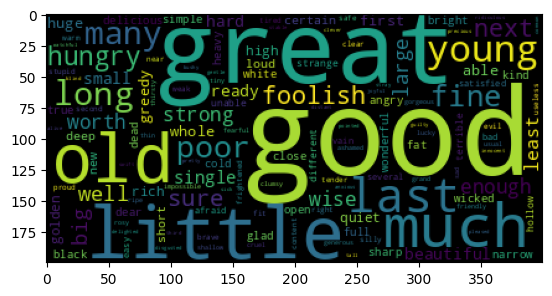

In [43]:
#@markdown 📌 Wordcloud by POS:

pos = "ADJ" #@param = ["VERB","NOUN","ADJ","ADV"]
df1 = df[df["POS"] == pos]; print(len(df1))

# as list
freq1 = list(df1["Freq"])
txt1 = list(df1["Word"])

# Repeat words by Freq
import numpy as np
# x = np.array(txt1)
y = np.repeat(txt1, freq1, axis=0)
y = list(y)

txt2 = ' '.join(y)

print(df[df["POS"] == pos])
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Collocations = False (otherwise, Wordcloud takes 'light light' as a collocation and add it on the wordcloud )
wc = WordCloud(collocations = False).generate(str(txt2))
plt.imshow(wc)

254
      POS        Word  Freq
202   ADV        very   147
26    ADV          so   139
73    ADV        then    70
242   ADV        away    61
326   ADV        soon    55
...   ...         ...   ...
3035  ADV      softly     1
3043  ADV      course     1
3070  ADV  pleasantly     1
3078  ADV   meaningly     1
3100  ADV     loosely     1

[254 rows x 3 columns]


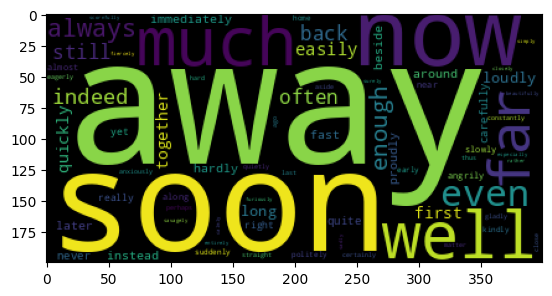

In [44]:
#@markdown 📌 Wordcloud by POS:

pos = "ADV" #@param = ["VERB","NOUN","ADJ","ADV"]
df1 = df[df["POS"] == pos]; print(len(df1))

# as list
freq1 = list(df1["Freq"])
txt1 = list(df1["Word"])

# Repeat words by Freq
import numpy as np
# x = np.array(txt1)
y = np.repeat(txt1, freq1, axis=0)
y = list(y)

txt2 = ' '.join(y)

print(df[df["POS"] == pos])
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Collocations = False (otherwise, Wordcloud takes 'light light' as a collocation and add it on the wordcloud )
wc = WordCloud(collocations = False).generate(str(txt2))
plt.imshow(wc)

## ⛅ ⛅ I don't like the background in black. I want it WHITE!!! ⛄⚡

In [45]:
#@markdown 📌 Exclude short words from your word cloud.

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
#stopwords.add('us')
len(stopwords)
spltxt = text.split()

693


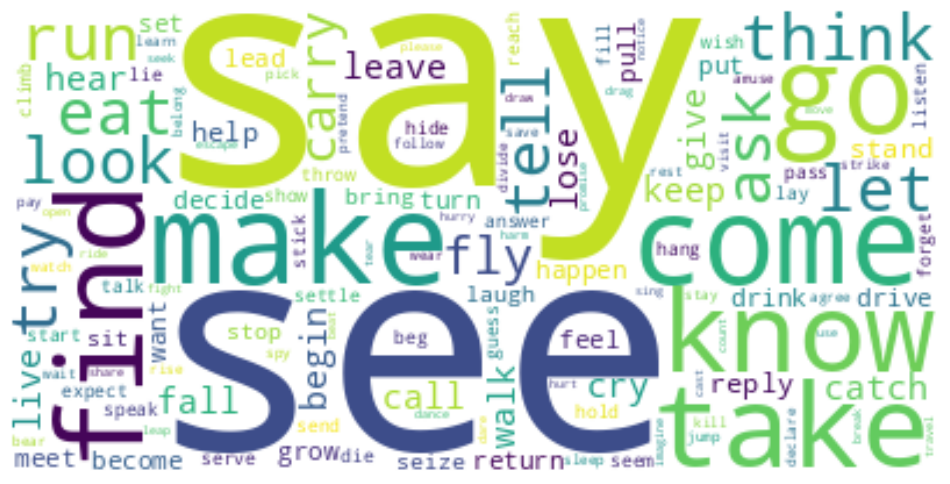

In [46]:
#@markdown 📌 Wordcloud by POS:

pos = "VERB" #@param = ["VERB","NOUN","ADJ","ADV"]
df1 = df[df["POS"] == pos]; print(len(df1))

# as list
freq1 = list(df1["Freq"])
txt1 = list(df1["Word"])

# Repeat words by Freq
import numpy as np
# x = np.array(txt1)
y = np.repeat(txt1, freq1, axis=0)
spltxt = list(y)

wordcloud = WordCloud(stopwords=stopwords,relative_scaling = 0.2, random_state=3, collocations = False,
                      max_words=2000, background_color='white').generate(' '.join(spltxt))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
#plt.show()
#plt.savefig('wordcloud_title.png')
wordcloud.to_file('wordcloud_title.png')
# wordcloud.to_file('docs/png/wordcloud_title.png')

1188


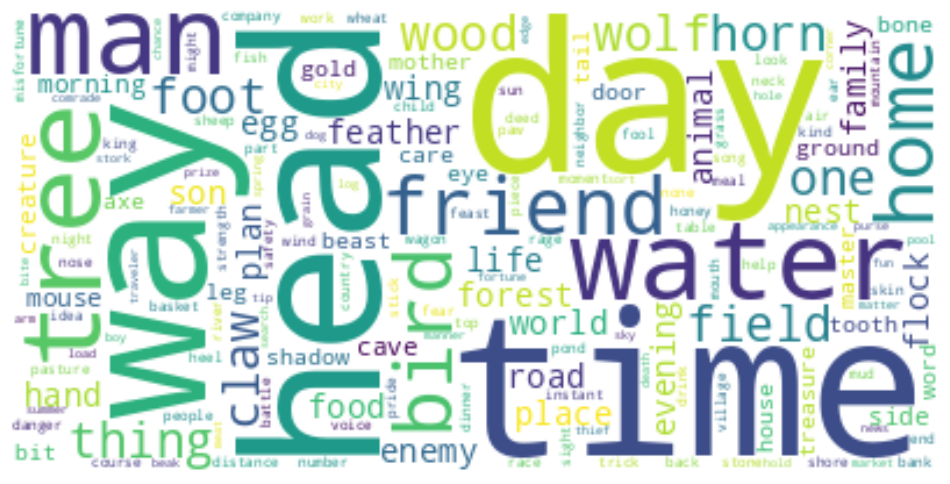

In [47]:
#@markdown 📌 Wordcloud by POS:

pos = "NOUN" #@param = ["VERB","NOUN","ADJ","ADV"]
df1 = df[df["POS"] == pos]; print(len(df1))

# as list
freq1 = list(df1["Freq"])
txt1 = list(df1["Word"])

# Repeat words by Freq
import numpy as np
# x = np.array(txt1)
y = np.repeat(txt1, freq1, axis=0)
spltxt = list(y)

wordcloud = WordCloud(stopwords=stopwords,relative_scaling = 0.2, random_state=3, collocations = False,
                      max_words=2000, background_color='white').generate(' '.join(spltxt))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
#plt.show()
#plt.savefig('wordcloud_title.png')
wordcloud.to_file('wordcloud_title.png')
# wordcloud.to_file('docs/png/wordcloud_title.png')

439


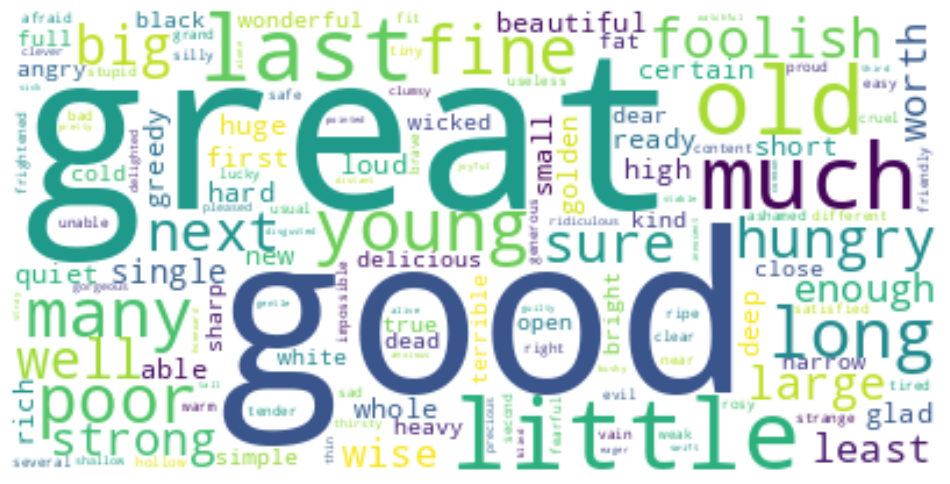

In [48]:
#@markdown 📌 Wordcloud by POS:

pos = "ADJ" #@param = ["VERB","NOUN","ADJ","ADV"]
df1 = df[df["POS"] == pos]; print(len(df1))

# as list
freq1 = list(df1["Freq"])
txt1 = list(df1["Word"])

# Repeat words by Freq
import numpy as np
# x = np.array(txt1)
y = np.repeat(txt1, freq1, axis=0)
spltxt = list(y)

wordcloud = WordCloud(stopwords=stopwords,relative_scaling = 0.2, random_state=3, collocations = False,
                      max_words=2000, background_color='white').generate(' '.join(spltxt))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
#plt.show()
#plt.savefig('wordcloud_title.png')
wordcloud.to_file('wordcloud_title.png')
# wordcloud.to_file('docs/png/wordcloud_title.png')

254


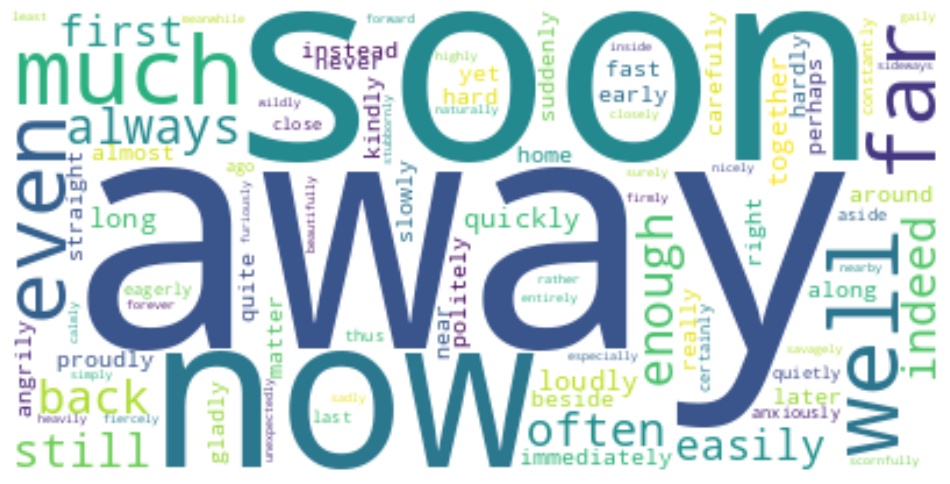

In [49]:
#@markdown 📌 Wordcloud by POS:

pos = "ADV" #@param = ["VERB","NOUN","ADJ","ADV"]
df1 = df[df["POS"] == pos]; print(len(df1))

# as list
freq1 = list(df1["Freq"])
txt1 = list(df1["Word"])

# Repeat words by Freq
import numpy as np
# x = np.array(txt1)
y = np.repeat(txt1, freq1, axis=0)
spltxt = list(y)

wordcloud = WordCloud(stopwords=stopwords,relative_scaling = 0.2, random_state=3, collocations = False,
                      max_words=2000, background_color='white').generate(' '.join(spltxt))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
#plt.show()
#plt.savefig('wordcloud_title.png')
wordcloud.to_file('wordcloud_title.png')
# wordcloud.to_file('docs/png/wordcloud_title.png')